# Projeto 3 - Predição de varíavel quantitativa

----
## Introdução

Quando se trata de viagens, seja a passeio ou a trabalho, um cronograma pré-determinado é essencial para a organização da viagem. Entretanto, por mais que um cronograma seja montado pensando nas mais diversas variáveis, o atraso de voos nos aeroportos tende a pegar os viajantes de surpresa, sendo um dos mais frequentes fatores de alteração no cronograma dos viajantes. 

Pensando nisso, o objetivo deste projeto é criar um **modelo de predição de atrasos de voos domésticos nos EUA**, utilizando um dataset que contém informações de todos os voos domésticos ocorridos em 2023. Visando aumentar o desempenho do modelo, escolhemos prever o atraso dos voos apenas do **aeroporto de Atlanta**, de onde sairam a maior quantidade de voos em 2023. A variável principal (target), portanto, é o atraso de partida do voo em minutos.

O modelo será desenvolvido com o intuito de fornecer insights e previsões precisas sobre os atrasos de voos, auxiliando na tomada de decisões e no planejamento de viagens aéreas. Para isso, o projeto foi dividido em algumas etapas, sendo elas:

1) Descrição do dataset 
2) Importação e tratamento do dataset
3) Análise exploratória dos dados
5) Construção e avaliação do modelo de predição
6) Conclusão
7) Bibliografia


----
## 1) Descrição do dataset

### Limpeza

Os dados utilizados neste projeto foram obtidos na plataforma Kaggle e contém informações sobre todos os voos domésticos ocorridos nos EUA em 2023. O dataset é composto por 6.743.404 linhas e 24 colunas, sendo que cada linha representa um voo e cada coluna representa uma variável.

Devido ao tamanho do dataset, foi necessário realizar um pré-processamento dos dados para que fosse possível realizar a análise exploratória e a construção do modelo de predição. O pré-processamento consistiu nas seguintes etapas:

1) Filtragem do dataset para conter apenas os voos que partiram de Atlanta;
2) Análise das variáveis e remoção das colunas que não seriam utilizadas no modelo, sendo elas²:
    1) Descrição do avião (detalhes técnicos do modelo dos aviões);
    2) Nome das cidades de partida e chegada (código do aeroporto é mais relevante e o ponto de partida sempre será o aeroporto de Atlanta);
    3) Duração do voo (a duração exata do voo gera uma informação pouco relevante, sendo mais eficiente análisar o tipo da duração do voo);
3) Alterar a variável da data completa dos voos para apenas o mês dos voos, facilitando a generalização do modelo.  

### Descrição de variáveis

| Atributos | Descrição | Possíveis Valores |
|------|------|------|
|   Month  | Mês em que os voos foram realizados | 1 a 12 |
|   Day_Of_Week  | Dia da semana em que os voos foram realizados | 1 a 7 |
|   Airline  | Nome da companhia aérea | Southwest Airlines Co., Delta Air Lines Inc, American Airlines Inc., United Air Lines Inc., Skywest Airlines Inc., Republic Airways, JetBlue Airways, Spirit Air Lines, Alaska Airlines Inc., American Eagle Airlines Inc., Endeavor Air, PSA Airlines, Frontier Airlines Inc., Allegiant Air, Hawaiian Airlines Inc.
|   DepTime_label  | Período de partida dos voos | Morning, Afternon, Evening, Night |
|   Dep_Delay_Tag  | Tag de atraso na partida dos voos | 0: Sem atraso ou atrasos menores que 5 minutos; 1: Atrasos maiores que 5 minutos |
|   Dep_Delay_Type  | Tipo de atraso na partida dos voos | Low <5min, Medium >15min, Hight >60min |
|   Distance_type  | Tipo de voo baseado na distância | Short Haul < 1500Mi, Medium Haul < 3000Mi, Long Haul < 6000Mi |
|   tavg    | Temperatura média no dia | Graus celsius |
|	prcp    | Precipitação no dia | Milímetros |
|	wspd    | Velocidade do vento no momento da partida | Nós |

- **Target**: Prever o valor da variável **Dep_Delay** (tempo de atraso da partida do voo) é o principal objetivo do modelo, sendo portanto a o target.
- **Features**: A partir da análise exploratória, será demonstrada a relevância de cada uma
    - **Month**: Diferentes períodos do ano têm influência na quantidade e duração de atrasos em voos.
    - **Day_Of_Week**: Diferentes dias da semana têm influência na quantidade e duração de atrasos em voos.
    - **Airline**: Diferentes companhias aéreas têm maior tendência a cometerem atrasos, devido à organização da operação.
    - **DepTime_label**: Em cada período do dia, a operação sofre mudanças, o que pode causar atrasos.
    - **Dep_Delay_Type**: Classificação relativa ao tempo de atraso.
    - **Distance_Type**: Os preparativos para um voo dependem principalmente de sua duração. Tais preparativos podem ocasionar em atrasos na partida.
    - **Variáveis climáticas**: Condições climáticas (Temperatura média, precipitação e velocidade do vento) podem causar atrasos.

----
## 2) Importação e tratamento do dataset
Nesta seção será implementada a preparação proposta no item 1.

In [1]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import *
import statsmodels.api as sm

In [2]:
# Leitura do dataset
dados = pd.read_csv('US_flights_2023.csv')
dados_clima = pd.read_csv('weather_meteo_by_airport.csv')


### Limpeza e pré-processamento de dados

In [3]:
# Obtendo os dados do aerorpot de Atlanta (ATL)
dados = dados.loc[dados.Dep_Airport == 'ATL', :]
dados_clima = dados_clima.loc[dados_clima['airport_id'] == 'ATL', :]

# Verificando os dados
display(dados.columns, dados.shape, dados.dtypes)
display(dados_clima.columns, dados_clima.shape, dados_clima.dtypes)

Index(['FlightDate', 'Day_Of_Week', 'Airline', 'Tail_Number', 'Dep_Airport',
       'Dep_CityName', 'DepTime_label', 'Dep_Delay', 'Dep_Delay_Tag',
       'Dep_Delay_Type', 'Arr_Airport', 'Arr_CityName', 'Arr_Delay',
       'Arr_Delay_Type', 'Flight_Duration', 'Distance_type', 'Delay_Carrier',
       'Delay_Weather', 'Delay_NAS', 'Delay_Security', 'Delay_LastAircraft',
       'Manufacturer', 'Model', 'Aicraft_age'],
      dtype='object')

(332935, 24)

FlightDate            object
Day_Of_Week            int64
Airline               object
Tail_Number           object
Dep_Airport           object
Dep_CityName          object
DepTime_label         object
Dep_Delay              int64
Dep_Delay_Tag          int64
Dep_Delay_Type        object
Arr_Airport           object
Arr_CityName          object
Arr_Delay              int64
Arr_Delay_Type        object
Flight_Duration        int64
Distance_type         object
Delay_Carrier          int64
Delay_Weather          int64
Delay_NAS              int64
Delay_Security         int64
Delay_LastAircraft     int64
Manufacturer          object
Model                 object
Aicraft_age            int64
dtype: object

Index(['time', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'pres',
       'airport_id'],
      dtype='object')

(365, 10)

time           object
tavg          float64
tmin          float64
tmax          float64
prcp          float64
snow          float64
wdir          float64
wspd          float64
pres          float64
airport_id     object
dtype: object

In [4]:
dados_clima_subset = dados_clima[['time', 'tavg', 'prcp', 'wspd']]

# Realiza o merge com a subset dos dados_clima
dados = dados.merge(dados_clima_subset, left_on='FlightDate', right_on='time', how='left')

# Remove a coluna 'time' resultante da mesclagem
dados.drop('time', axis=1, inplace=True)

In [5]:
# Descartando colunas que não serão utilizadas
columns_to_drop = ['Tail_Number', 'Dep_CityName', 'Dep_Delay_Tag', 'Arr_Airport', 'Arr_CityName','Arr_Delay_Type', 'Flight_Duration', 'Manufacturer', 'Model', 'Aicraft_age', 'Dep_Airport']

for column in columns_to_drop:
    dados = dados.drop(column, axis=1)

In [6]:
dados.head(5)

,FlightDate,Day_Of_Week,Airline,DepTime_label,Dep_Delay,Dep_Delay_Type,Arr_Delay,Distance_type,Delay_Carrier,Delay_Weather,Delay_NAS,Delay_Security,Delay_LastAircraft,tavg,prcp,wspd
0,2023-01-09,1,Endeavor Air,Afternoon,-3,Low <5min,-12,Short Haul >1500Mi,0,0,0,0,0,8.0,0.0,9.3
1,2023-01-10,2,Endeavor Air,Afternoon,-5,Low <5min,-12,Short Haul >1500Mi,0,0,0,0,0,7.3,0.0,2.7
2,2023-01-11,3,Endeavor Air,Afternoon,-2,Low <5min,-7,Short Haul >1500Mi,0,0,0,0,0,11.0,0.0,3.2
3,2023-01-12,4,Endeavor Air,Afternoon,16,Medium >15min,11,Short Haul >1500Mi,0,0,0,0,0,15.5,20.1,11.7
4,2023-01-13,5,Endeavor Air,Afternoon,-3,Low <5min,-8,Short Haul >1500Mi,0,0,0,0,0,5.7,0.3,19.8


In [7]:
# Adaptando as colunas para o tipo correto
dados.Day_Of_Week = dados.Day_Of_Week.astype('category')

dados.Dep_Delay_Type = dados.Dep_Delay_Type.astype('category') # Tipo do atraso na partida
dados['Dep_Delay_Type'] = pd.Categorical(dados['Dep_Delay_Type'], categories=['Low <5min', 'Medium >15min', 'Hight >60min'], ordered=True)

dados.Distance_type = dados.Distance_type.astype('category') # Tipo da distância
dados['Distance_type'] = pd.Categorical(dados['Distance_type'], categories=['Short Haul >1500Mi', 'Medium Haul <3000Mi', 'Long Haul <6000Mi'], ordered=True)

# Substituindo a data do voo pelo mês
dados['FlightDate'] = pd.to_datetime(dados['FlightDate']).dt.month
dados.rename(columns={'FlightDate': 'Month'}, inplace=True)

# Adicionando a coluna de atraso total
dados['Total_Delay'] = dados['Dep_Delay'] + dados['Arr_Delay']


# Verificando os dados
display(dados.head(5))
display(dados.columns)
display(dados.shape)

,Month,Day_Of_Week,Airline,DepTime_label,Dep_Delay,Dep_Delay_Type,Arr_Delay,Distance_type,Delay_Carrier,Delay_Weather,Delay_NAS,Delay_Security,Delay_LastAircraft,tavg,prcp,wspd,Total_Delay
0,1,1,Endeavor Air,Afternoon,-3,Low <5min,-12,Short Haul >1500Mi,0,0,0,0,0,8.0,0.0,9.3,-15
1,1,2,Endeavor Air,Afternoon,-5,Low <5min,-12,Short Haul >1500Mi,0,0,0,0,0,7.3,0.0,2.7,-17
2,1,3,Endeavor Air,Afternoon,-2,Low <5min,-7,Short Haul >1500Mi,0,0,0,0,0,11.0,0.0,3.2,-9
3,1,4,Endeavor Air,Afternoon,16,Medium >15min,11,Short Haul >1500Mi,0,0,0,0,0,15.5,20.1,11.7,27
4,1,5,Endeavor Air,Afternoon,-3,Low <5min,-8,Short Haul >1500Mi,0,0,0,0,0,5.7,0.3,19.8,-11


Index(['Month', 'Day_Of_Week', 'Airline', 'DepTime_label', 'Dep_Delay',
       'Dep_Delay_Type', 'Arr_Delay', 'Distance_type', 'Delay_Carrier',
       'Delay_Weather', 'Delay_NAS', 'Delay_Security', 'Delay_LastAircraft',
       'tavg', 'prcp', 'wspd', 'Total_Delay'],
      dtype='object')

(332935, 17)

In [8]:
dados.dtypes

Month                    int32
Day_Of_Week           category
Airline                 object
DepTime_label           object
Dep_Delay                int64
Dep_Delay_Type        category
Arr_Delay                int64
Distance_type         category
Delay_Carrier            int64
Delay_Weather            int64
Delay_NAS                int64
Delay_Security           int64
Delay_LastAircraft       int64
tavg                   float64
prcp                   float64
wspd                   float64
Total_Delay              int64
dtype: object

----
## 3) Análise exploratória dos dados

### 3.1) Análise univariada

#### Análise univariada qualitiva
Distribuição das varíaveis qualitativas no dataset

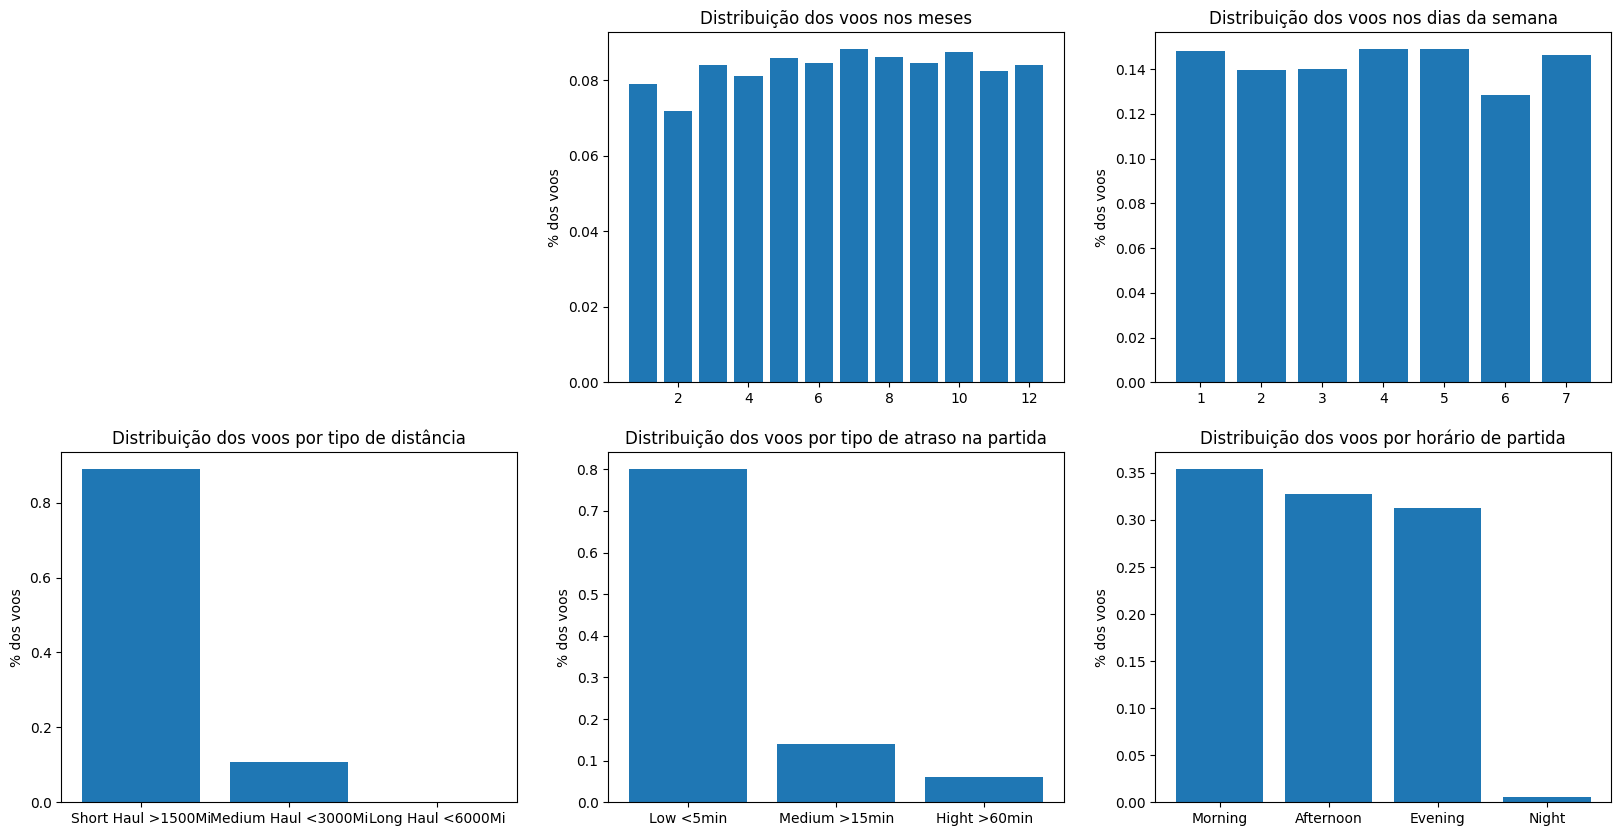

In [9]:
contagem = {}
for column in dados.columns:
    if dados[column].dtype.name != 'int64':
        contagem[column] = dados[column].value_counts(True)

plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 2)
plt.bar(contagem['Month'].index, contagem['Month'].values)
plt.ylabel('% dos voos')
plt.title('Distribuição dos voos nos meses')

plt.subplot(2, 3, 3)
plt.bar(contagem['Day_Of_Week'].index, contagem['Day_Of_Week'].values)
plt.ylabel('% dos voos')
plt.title('Distribuição dos voos nos dias da semana')

plt.subplot(2, 3, 4)
plt.bar(contagem['Distance_type'].index, contagem['Distance_type'].values)
plt.ylabel('% dos voos')
plt.title('Distribuição dos voos por tipo de distância')

plt.subplot(2, 3, 5)
plt.bar(contagem['Dep_Delay_Type'].index, contagem['Dep_Delay_Type'].values)
plt.ylabel('% dos voos')
plt.title('Distribuição dos voos por tipo de atraso na partida')

plt.subplot(2, 3, 6)
plt.bar(contagem['DepTime_label'].index, contagem['DepTime_label'].values)
plt.ylabel('% dos voos')
plt.title('Distribuição dos voos por horário de partida')

plt.show()


- **Companhias áereas**: Há claramente um domínio de mercado pela companhia Delta Airlines.
- **Análise temporal**: Durante a semana, observa-se pouca variação entre a quantidade de voos. Da mesma forma, durante o ano, só se nota uma alteração sutíl no mês de julho, o que pode ser explicado pelas férias que geralmente ocorrem nesse período. Por outra lado, analisando os horários dos voos, observa-se preferência grande por voos não noturnos.
- **Distância**: A maioria dos voos constituem trajetos curtos (<1500 milhas) ou médios (<3000 milhas). Uma parte pequena é composta por voos longos, o que pode ser explicado pelo fato de se tratarem de voos domésticos.
- **Frequência dos atrasos**: Em aproxidamente 80% dos casos, não ocorrem atrasos significativos (<5 min) no aeroporto de Atlanta. Quando ocorrem, entretanto, é mais provavél encontrar um atraso médio.

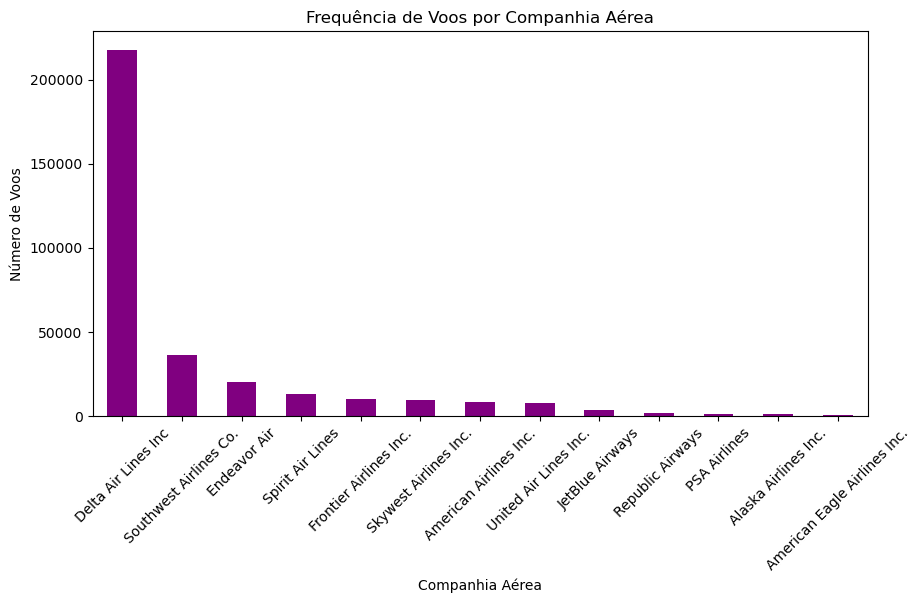

In [12]:
plt.figure(figsize=(10, 5))
dados['Airline'].value_counts().plot(kind='bar', color='purple')
plt.title('Frequência de Voos por Companhia Aérea')
plt.xlabel('Companhia Aérea')
plt.ylabel('Número de Voos')
plt.xticks(rotation=45)
plt.show()

- Há claramente uma dominância de mercado da Delta Airlines.

#### Análise univariada quantitativa
Análise individual de variáveis quantitativas

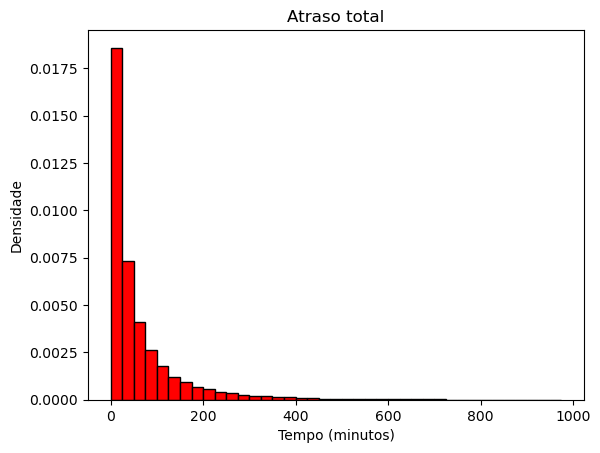

In [13]:
faixa = np.arange(0, 1000, 25)

plt.hist(dados['Total_Delay'].dropna(), bins=faixa, color='red', edgecolor='black', density=True)
plt.title('Atraso total')
plt.xlabel('Tempo (minutos)')
plt.ylabel('Densidade')
plt.show()

- De maneira geral, o atraso total dificilmente será maior que 200 minutos. 

#### Componentes do atraso

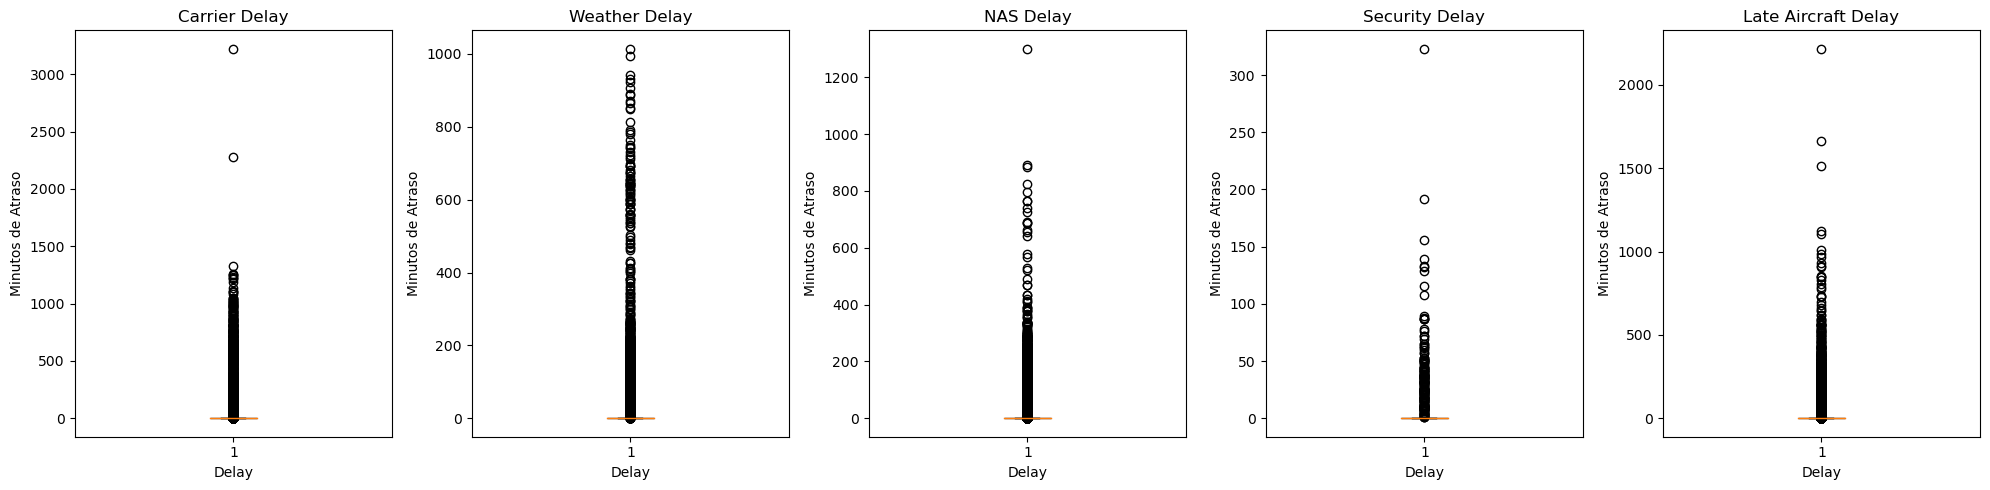

In [14]:
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
delay_types = ['Delay_Carrier', 'Delay_Weather', 'Delay_NAS', 'Delay_Security', 'Delay_LastAircraft']
delay_titles = ['Carrier Delay', 'Weather Delay', 'NAS Delay', 'Security Delay', 'Late Aircraft Delay']
for i, delay in enumerate(delay_types):
    ax[i].boxplot(dados[delay].dropna(), patch_artist=True)
    ax[i].set_title(delay_titles[i])
    ax[i].set_xlabel('Delay')
    ax[i].set_ylabel('Minutos de Atraso')
plt.tight_layout()
plt.show()

- Para todos as componentes do atraso de partida, observa-se a mesma tendência: a grande maioria tem o valor 0, visto que a maioria dos voos não têm atraso. 
- Entre os voos atrasados:
    - **Carrier Delay**: Varia entre 0 e aprox. 1200. Valores acima configuram outliers
    - **Weather Delay**: Somente valores acima de 800 configuram outliers, tendo uma distribuição mais homogênea.
    - **NAS Delay**: Varia entre 0 e 400. Valores acima configuram outliers
    - **Security Delay**: Sendo o menos frequente e menos significativo, varia entre 0 e aprox. 80. Valores acima configuram outliers.
    - **Late Aircraft Delay**: Varia de 0 e 800. Valores acima configuram outliers.

### 3.2) Análise multivariada

#### Correlação entre as componentes e o tempo total de atraso de um voo

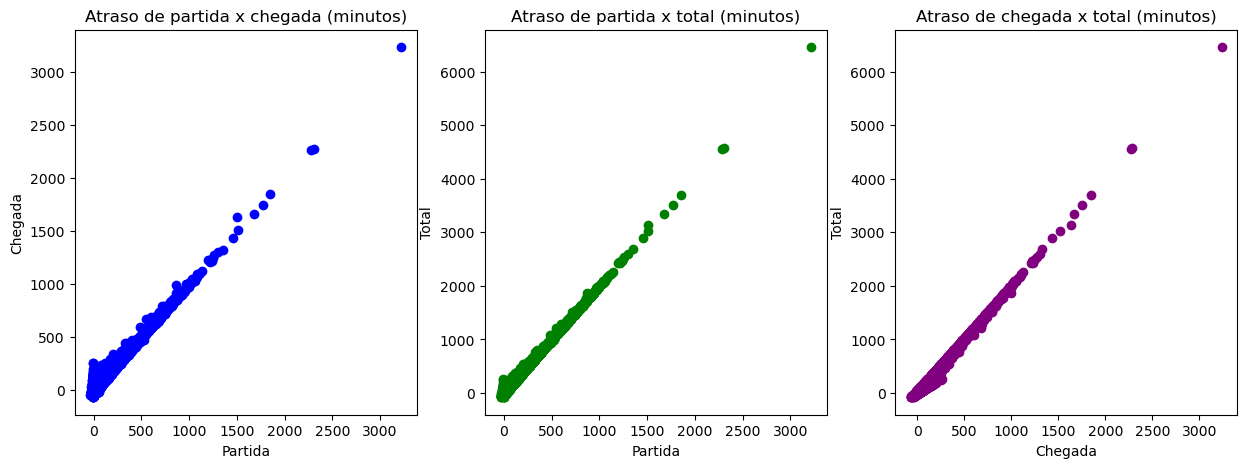

Correlação linear entre partida e chegada: 0.9668532984753058
Correlação linear entre partida e total: 0.9913137497116199
Correlação linear entre chegada e total: 0.9920358553844646


In [15]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(dados['Dep_Delay'], dados['Arr_Delay'], color='blue')
plt.title('Atraso de partida x chegada (minutos)')
plt.xlabel('Partida')
plt.ylabel('Chegada')

plt.subplot(1, 3, 2)
plt.scatter(dados['Dep_Delay'], dados['Total_Delay'], color='green')
plt.title('Atraso de partida x total (minutos)')
plt.xlabel('Partida')
plt.ylabel('Total')

plt.subplot(1, 3, 3)
plt.scatter(dados['Arr_Delay'], dados['Total_Delay'], color='purple')
plt.title('Atraso de chegada x total (minutos)')
plt.xlabel('Chegada')
plt.ylabel('Total')

plt.show()

print('Correlação linear entre partida e chegada:', dados['Dep_Delay'].corr(dados['Arr_Delay']))
print('Correlação linear entre partida e total:', dados['Dep_Delay'].corr(dados['Total_Delay']))
print('Correlação linear entre chegada e total:', dados['Arr_Delay'].corr(dados['Total_Delay']))

- O atraso na partida está fortemente relacionado ao atraso na chegada (visto pelo coeficiente de correlação linear), indicando que o atraso se propaga durante o processo. Da mesma forma, o atraso na partida e na chegada estão fortemente relacionados com atraso total, analisando individualmente.

#### Análise do atraso de acordo com a companhia aérea e o dia da semana

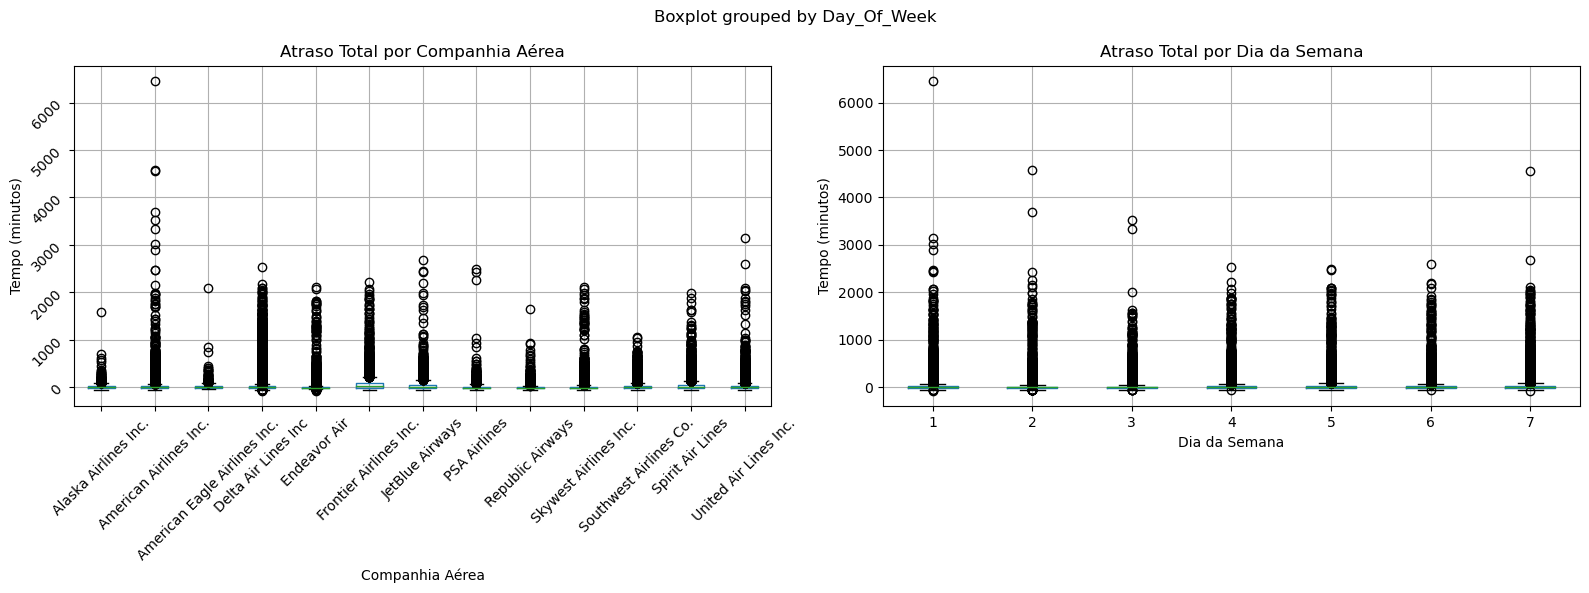

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

dados.loc[dados.Dep_Delay_Type != 0, :].boxplot(column='Total_Delay', by='Airline', ax=ax[0])
ax[0].set_title('Atraso Total por Companhia Aérea')
ax[0].set_xlabel('Companhia Aérea')
ax[0].set_ylabel('Tempo (minutos)')
ax[0].tick_params(labelrotation=45)

dados.loc[dados.Dep_Delay_Type != 0, :].boxplot(column='Total_Delay', by='Day_Of_Week', ax=ax[1])
ax[1].set_title('Atraso Total por Dia da Semana')
ax[1].set_xlabel('Dia da Semana')
ax[1].set_ylabel('Tempo (minutos)')

plt.tight_layout()
plt.show()

- **Companhias Aéreas**: A maior companhia do segmento é a que apresenta não só mais atrasos como também o maior intervalo de atrasos, desconsiderando outliers. Isso pode indicar que a companhia tem problemas em atender à demanda de voos domésticos.
- **Dias da Semana**: Com exceção do terceiro dia da semana, que apresenta uma faixa de atraso sutilmente menor que os outros dias, não parece haver uma tendência específica relacionada ao dia da semana que o voo ocorre.

#### Análise temporal

Tempo médio de atraso por mês do ano

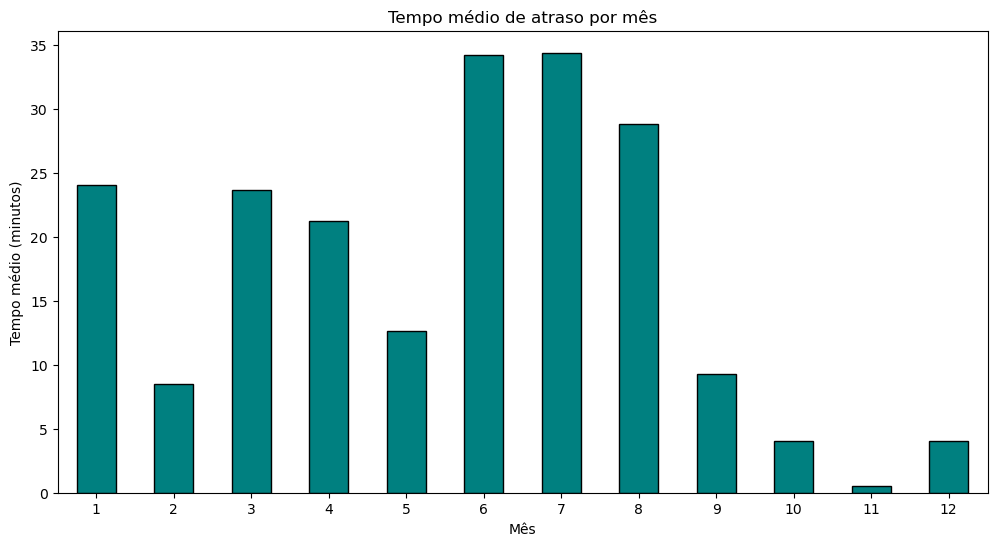

In [17]:
plt.figure(figsize=(12, 6))
monthly_delays = dados.groupby('Month')['Total_Delay'].mean()
monthly_delays.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Tempo médio de atraso por mês')
plt.xlabel('Mês')
plt.ylabel('Tempo médio (minutos)')
plt.xticks(rotation=0)
plt.show()

- O mês de julho é o mês com maior atraso médio. Isso é um indicador importante, dado que a diferença no volume de voos, como foi analisado anteriormente, não se comporta da mesma forma que a diferença no atraso total entre os meses (observe julho e novembro, por exemplo). Por outro lado, a provavel explicação é o maior volume de voos nesse período de férias.

Tempo médio de atraso por dia da semana

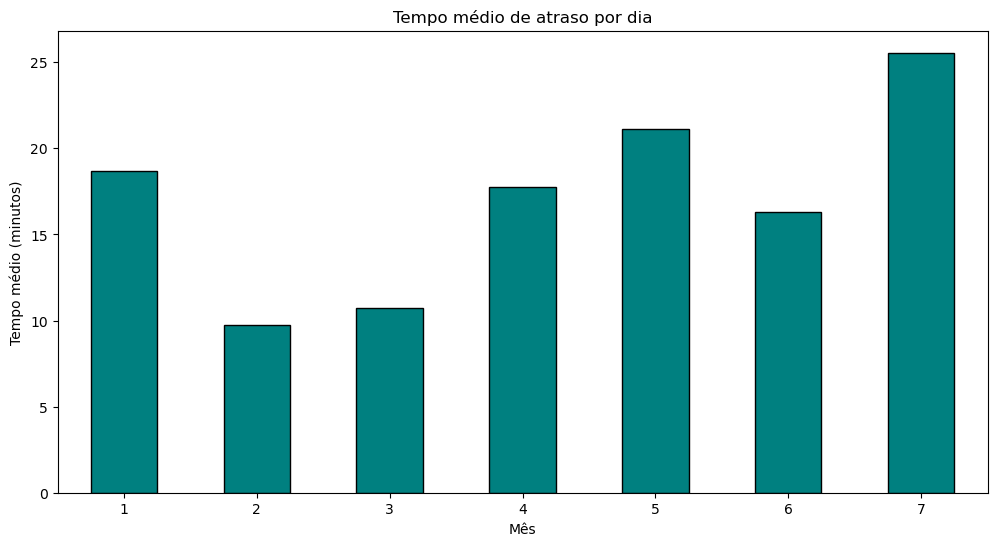

In [18]:
plt.figure(figsize=(12, 6))
monthly_delays = dados.groupby('Day_Of_Week')['Total_Delay'].mean()
monthly_delays.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Tempo médio de atraso por dia')
plt.xlabel('Mês')
plt.ylabel('Tempo médio (minutos)')
plt.xticks(rotation=0)
plt.show()

Tempo médio de atraso por período do dia

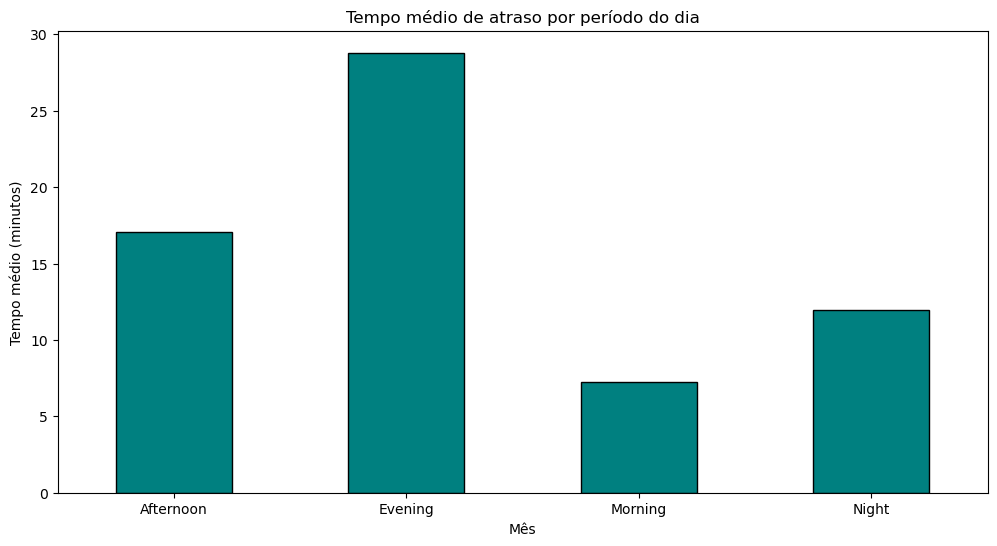

In [19]:
plt.figure(figsize=(12, 6))
monthly_delays = dados.groupby('DepTime_label')['Total_Delay'].mean()
monthly_delays.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Tempo médio de atraso por período do dia')
plt.xlabel('Mês')
plt.ylabel('Tempo médio (minutos)')
plt.xticks(rotation=0)
plt.show()

### Conclusão
Como foi constatado, a relação entre as componentes do atraso indica que estas estão completamente relacionadas. Dessa forma, é plausível se desfazer das componentes, tratando apenas a variável target (atraso de partida).

In [20]:
# Excluindo as componentes do atraso do dataframe
dados = dados.drop(['Arr_Delay', 'Total_Delay', 'Delay_Carrier', 'Delay_Weather', 'Delay_NAS', 'Delay_Security', 'Delay_LastAircraft'], axis=1)
dados.head()

,Month,Day_Of_Week,Airline,DepTime_label,Dep_Delay,Dep_Delay_Type,Distance_type,tavg,prcp,wspd
0,1,1,Endeavor Air,Afternoon,-3,Low <5min,Short Haul >1500Mi,8.0,0.0,9.3
1,1,2,Endeavor Air,Afternoon,-5,Low <5min,Short Haul >1500Mi,7.3,0.0,2.7
2,1,3,Endeavor Air,Afternoon,-2,Low <5min,Short Haul >1500Mi,11.0,0.0,3.2
3,1,4,Endeavor Air,Afternoon,16,Medium >15min,Short Haul >1500Mi,15.5,20.1,11.7
4,1,5,Endeavor Air,Afternoon,-3,Low <5min,Short Haul >1500Mi,5.7,0.3,19.8


---- 
## 4) Modelagem e Desempenho

In [21]:
def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

#### Criação de dummies

As colunas do dataframe foram transformadas em dummies para representar variáveis categóricas como variáveis binárias. Isso permite que os algoritmos de predição processem essas variáveis de forma adequada, pois eles geralmente trabalham melhor com valores numéricos. A transformação em dummies cria novas colunas, onde cada uma representa uma categoria da variável original, com valores 0 ou 1 indicando a presença ou ausência da categoria.

No nosso modelo, as variáveis categóricas transformadas em dummies foram as seguintes: Dep_Delay_Type, Distance_type, Day_Of_Week, DepTime_label, Airline, Month. 


In [22]:
dummies = pd.get_dummies(dados['Dep_Delay_Type'], prefix='Dep_Delay_Type', drop_first=True, dtype='int64')
dados = pd.concat([dados, dummies], axis=1)

dummies = pd.get_dummies(dados['Distance_type'], prefix='Distance_type', drop_first=True, dtype='int64')
dados = pd.concat([dados, dummies], axis=1)

dummies = pd.get_dummies(dados['Day_Of_Week'], prefix='Day_Of_Week', drop_first=True, dtype='int64')
dados = pd.concat([dados, dummies], axis=1)

dummies = pd.get_dummies(dados['DepTime_label'], prefix='DepTime_label', drop_first=True, dtype='int64')
dados = pd.concat([dados, dummies], axis=1)

dummies = pd.get_dummies(dados['Airline'], prefix='Airline', drop_first=True, dtype='int64')
dados = pd.concat([dados, dummies], axis=1)

dummies = pd.get_dummies(dados['Month'], prefix='Month', drop_first=True, dtype='int64')
dados = pd.concat([dados, dummies], axis=1)

In [23]:
dados_quant = dados.select_dtypes(include=['float64', 'int64'])
dados_quant.head(5)

,Month,Dep_Delay,tavg,prcp,wspd,Dep_Delay_Type_Medium >15min,Dep_Delay_Type_Hight >60min,Distance_type_Medium Haul <3000Mi,Distance_type_Long Haul <6000Mi,Day_Of_Week_2,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,1,-3,8.0,0.0,9.3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,-5,7.3,0.0,2.7,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,-2,11.0,0.0,3.2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,16,15.5,20.1,11.7,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,-3,5.7,0.3,19.8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# Removendo as colunas que possuiam um valor p elevado, sendo indiferentes para o modelo.
X = dados_quant.drop(['Dep_Delay', 'Day_Of_Week_4', 'Day_Of_Week_5', 'wspd', 'DepTime_label_Morning', 'DepTime_label_Night', 'Airline_Republic Airways', 'Month_8'], axis=1)
Y = dados_quant['Dep_Delay']

results = regress(Y, X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Dep_Delay   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                 1.248e+04
Date:                Tue, 21 May 2024   Prob (F-statistic):               0.00
Time:                        15:12:37   Log-Likelihood:            -1.5962e+06
No. Observations:              332935   AIC:                         3.192e+06
Df Residuals:                  332901   BIC:                         3.193e+06
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -3.9304      0.566     -6.940      0.000      -5.040      -2.820
Month                                   -0.0521      0.050     -1.035      0.301      -0.151       0.047
tavg                                     0.0598      0.015      3.984      0.000       0.030       0.089
prcp                                     0.0858      0.007     12.824      0.000       0.073       0.099
Dep_Delay_Type_Medium >15min            32.0679      0.150    213.239      0.000      31.773      32.363
Dep_Delay_Type_Hight >60min            131.7152      0.221    597.076      0.000     131.283     132.148
Distance_type_Medium Haul <3000Mi        0.8310      0.166      5.016      0.000       0.506       1.156
Distance_type_Long Haul <6000Mi          2.5061      1.250      2.005      0.045       0.056       4.956
Day_Of_Week_2                           -0.6980      0.156     -4.481      0.000      -1.003      -0.393
Day_Of_Week_3                           -0.8232      0.155     -5.294      0.000      -1.128      -0.518
Day_Of_Week_6                           -0.3363      0.161     -2.088      0.037      -0.652      -0.021
Day_Of_Week_7                            0.3933      0.154      2.561      0.010       0.092       0.694
DepTime_label_Evening                    1.0812      0.111      9.773      0.000       0.864       1.298
Airline_American Airlines Inc.           5.4540      0.601      9.071      0.000       4.276       6.632
Airline_American Eagle Airlines Inc.     3.2614      1.413      2.309      0.021       0.493       6.030
Airline_Delta Air Lines Inc              2.2019      0.514      4.280      0.000       1.194       3.210
Airline_Endeavor Air                     1.3452      0.552      2.437      0.015       0.264       2.427
Airline_Frontier Airlines Inc.           5.1482      0.588      8.758      0.000       3.996       6.300
Airline_JetBlue Airways                  6.9518      0.713      9.753      0.000       5.555       8.349
Airline_PSA Airlines                     2.5307      0.981      2.581      0.010       0.609       4.453
Airline_Skywest Airlines Inc.            3.0491      0.592      5.146      0.000       1.888       4.210
Airline_Southwest Airlines Co.           2.8390      0.535      5.309      0.000       1.791       3.887
Airline_Spirit Air Lines                 4.3813      0.570      7.691      0.000       3.265       5.498
Airline_United Air Lines Inc.            4.7107      0.607      7.755      0.000       3.520       5.901
Month_2                                 -1.0658      0.246     -4.325      0.000      -1.549      -0.583
Month_3                                 -0.9831      0.224     -4.398      0.000      -1.421      -0.545
Month_4                               

#### Importe de bibliotecas necessárias

In [25]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
# !pip install catboost
from catboost import CatBoostRegressor

In [26]:
#Separando o dataframe em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

**Modelo de Regressão Linear:**

O modelo de regressão linear é um modelo estatístico que tem como objetivo modelar a relação entre uma variável dependente e uma ou mais variáveis independentes. No caso deste projeto, a variável dependente é o atraso de partida do voo e as variáveis independentes são as características dos voos.

In [27]:
reg_model = linear_model.LinearRegression()
reg_model = LinearRegression().fit(X_train, Y_train)

y_reg = reg_model.predict(X_test)
x_reg = reg_model.predict(X_train)

reg_model_diff = pd.DataFrame({'Actual value': Y_test, 'Predicted value': y_reg})

In [28]:
# Avaliando o modelo segundo os métodos do R^2 e RMS
print(f'R^2: {metrics.r2_score(Y_test, y_reg)}\n'
      f'Erro médio: {metrics.mean_squared_error(Y_test, y_reg, squared=False)}\n')      
reg_model_diff

R^2: 0.5420672374087551
Erro médio: 30.0324180214811



,Actual value,Predicted value
284810,34,28.900242
207475,33,31.737133
213221,52,32.816781
280247,4,2.059583
258683,-4,-1.029403
...,...,...
113877,-3,1.341298
230053,-3,-0.591321
72827,4,-0.212778
228948,3,-1.562545


**Modelo de Regressão Random Forest:**

O modelo de Random Forest é um modelo de aprendizado de máquina que utiliza várias árvores de decisão para prever o resultado de uma variável dependente. No caso deste projeto, o modelo de Random Forest será utilizado para prever o atraso de partida dos voos.

In [29]:
rfr_model = RandomForestRegressor(n_estimators=100)
rfr_model.fit(X_train, Y_train)

y_rfr = rfr_model.predict(X_test)
x_rfr = rfr_model.predict(X_train)

rfr_model_diff = pd.DataFrame({'Actual value': Y_test, 'Predicted value': y_rfr})

In [31]:
# Avaliando o modelo segundo os métodos do R^2 e RMS
print(f'R^2: {metrics.r2_score(Y_test, y_rfr)}\n'
      f'Erro médio: {metrics.mean_squared_error(Y_test, y_rfr, squared=False)}\n')

R^2: 0.4948235626065788
Erro médio: 31.543580265927876



**Modelo CatBoost de Regressão**

O Modelo CatBoost de Regressão é uma ferramenta de inteligência artificial que prevê valores com base em dados anteriores. Ele aprende com exemplos passados para fazer previsões precisas. O modelo é fácil de usar, funciona bem com pouca preparação de dados e é eficiente em termos de tempo e recursos.

In [32]:
cbr_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, loss_function='RMSE')
cbr_model = cbr_model.fit(X_train, Y_train)

x_cbr = cbr_model.predict(X_train)
y_cbr = cbr_model.predict(X_test)

cbr_model_diff = pd.DataFrame({'Actual value': Y_test, 'Predicted value': y_cbr})

0:	learn: 41.2933217	total: 178ms	remaining: 2m 57s
1:	learn: 39.2780563	total: 205ms	remaining: 1m 42s
2:	learn: 37.5419801	total: 234ms	remaining: 1m 17s
3:	learn: 36.0468932	total: 256ms	remaining: 1m 3s
4:	learn: 34.8032599	total: 269ms	remaining: 53.6s
5:	learn: 33.7616105	total: 278ms	remaining: 46.1s
6:	learn: 32.9017186	total: 287ms	remaining: 40.7s
7:	learn: 32.1712841	total: 295ms	remaining: 36.6s
8:	learn: 31.5629967	total: 304ms	remaining: 33.4s
9:	learn: 31.0495246	total: 312ms	remaining: 30.9s
10:	learn: 30.6410386	total: 320ms	remaining: 28.8s
11:	learn: 30.3021640	total: 328ms	remaining: 27s
12:	learn: 30.0069519	total: 337ms	remaining: 25.6s
13:	learn: 29.7699683	total: 344ms	remaining: 24.3s
14:	learn: 29.5860301	total: 353ms	remaining: 23.2s
15:	learn: 29.4169415	total: 360ms	remaining: 22.2s
16:	learn: 29.2746899	total: 368ms	remaining: 21.3s
17:	learn: 29.1562417	total: 376ms	remaining: 20.5s
18:	learn: 29.0668701	total: 384ms	remaining: 19.8s
19:	learn: 28.9832470

In [34]:
# Avaliando o modelo segundo os métodos do R^2 e RMS
print(f'R^2: {metrics.r2_score(Y_test, y_cbr)}\n'
      f'Erro médio: {metrics.mean_squared_error(Y_test, y_cbr, squared=False)}\n')

R^2: 0.5444570620564757
Erro médio: 29.953950063224248



**Avaliação dos modelos**

R^2 e RMSE:
- **R^2**: O método de avaliação R^2 é uma medida de quão bem os valores previstos se ajustam aos valores reais. O valor de R^2 varia de 0 a 1, sendo 1 o melhor valor possível.
- **RMSE**: O método de avaliação RMSE é uma medida de dispersão dos erros. Quanto menor o valor de RMSE, melhor o modelo. Ele representa quantos minutos, para mais, ou para menos, os voos se atrasarão em média.

**Conclusão**

De acordo com os métodos de avaliação dos modelos, os modelos de regressão linear, random forest e catboost apresentaram desempenho semelhante, o que pode ser observado pelos valores de R^2 (respectivamente, 0.5420, 0.4948 e 0.5444) e RMSE (respectivamente, 30.03, 31.54 e 29.95 minutos).

Entretanto, realizando apenas um teste com os modelos, o modelo CatBoost de Regressão foi aquele que apresentou um desempenho ligeiramente superior em relação aos demais, com o maior R^2 e menor RMSE.

Análise visual do desempenho de cada modelo

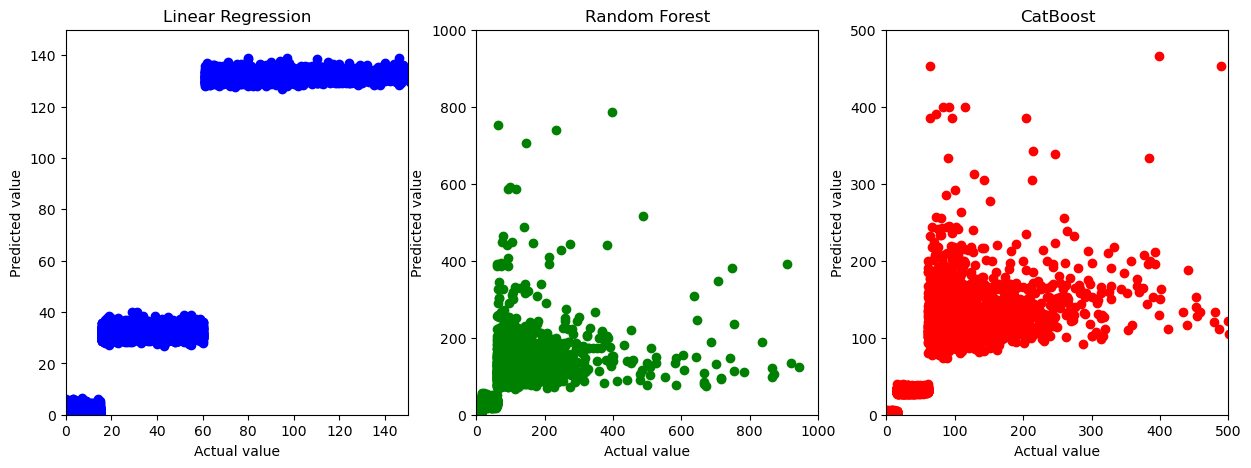

In [38]:
plt.figure(figsize=(15, 5))

# Regressão Linear
plt.subplot(1, 3, 1)
plt.plot(Y_test, y_reg, 'o', color='blue')
plt.xlim(0, 150)
plt.ylim(0, 150)
plt.title('Linear Regression')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')

# Random Forest
plt.subplot(1, 3, 2)
plt.plot(Y_test, y_rfr, 'o', color='green')
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.title('Random Forest')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')

# CatBoost
plt.subplot(1, 3, 3)
plt.plot(Y_test, y_cbr, 'o', color='red')
plt.title('CatBoost')
plt.xlim(0, 500)
plt.ylim(0, 500)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.show()

#### Validação Cruzada

In [43]:
r_reg, r_rfr, r_cbr = [], [], []
rmse_reg, rmse_rfr, rmse_cbr = [], [], []

for i in range(20, 30):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=i)

    # Regressão linear
    reg_model = linear_model.LinearRegression()
    reg_model = LinearRegression().fit(X_train, Y_train)

    y_reg = reg_model.predict(X_test)
    x_reg = reg_model.predict(X_train)

    reg_model_diff = pd.DataFrame({'Actual value': Y_test, 'Predicted value': y_reg})

        # Avaliando o modelo e guardando os resultados
    r_reg.append(metrics.r2_score(Y_test, y_reg))
    rmse_reg.append(metrics.mean_squared_error(Y_test, y_reg, squared=False))

    # Random Forest
    rfr_model = RandomForestRegressor(n_estimators=100)
    rfr_model.fit(X_train, Y_train)

    y_rfr = rfr_model.predict(X_test)
    x_rfr = rfr_model.predict(X_train)

    rfr_model_diff = pd.DataFrame({'Actual value': Y_test, 'Predicted value': y_rfr})

        # Avaliando o modelo e guardando os resultados
    r_rfr.append(metrics.r2_score(Y_test, y_rfr))
    rmse_rfr.append(metrics.mean_squared_error(Y_test, y_rfr, squared=False))

    # CatBoost
    cbr_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, loss_function='RMSE')
    cbr_model = cbr_model.fit(X_train, Y_train)

    x_cbr = cbr_model.predict(X_train)
    y_cbr = cbr_model.predict(X_test)

    cbr_model_diff = pd.DataFrame({'Actual value': Y_test, 'Predicted value': y_cbr})

        # Avaliando o modelo e guardando os resultados
    r_cbr.append(metrics.r2_score(Y_test, y_cbr))
    rmse_cbr.append(metrics.mean_squared_error(Y_test, y_cbr, squared=False))

0:	learn: 41.7576488	total: 23.8ms	remaining: 23.8s
1:	learn: 39.7588157	total: 171ms	remaining: 1m 25s
2:	learn: 38.0346547	total: 214ms	remaining: 1m 11s
3:	learn: 36.5583048	total: 250ms	remaining: 1m 2s
4:	learn: 35.3236493	total: 280ms	remaining: 55.7s
5:	learn: 34.2701282	total: 401ms	remaining: 1m 6s
6:	learn: 33.4100429	total: 445ms	remaining: 1m 3s
7:	learn: 32.6884063	total: 499ms	remaining: 1m 1s
8:	learn: 32.0817295	total: 522ms	remaining: 57.4s
9:	learn: 31.5674982	total: 652ms	remaining: 1m 4s
10:	learn: 31.1579833	total: 687ms	remaining: 1m 1s
11:	learn: 30.8060954	total: 716ms	remaining: 58.9s
12:	learn: 30.5018546	total: 744ms	remaining: 56.5s
13:	learn: 30.2566281	total: 764ms	remaining: 53.8s
14:	learn: 30.0484627	total: 898ms	remaining: 59s
15:	learn: 29.8777386	total: 934ms	remaining: 57.5s
16:	learn: 29.7257666	total: 972ms	remaining: 56.2s
17:	learn: 29.6130183	total: 999ms	remaining: 54.5s
18:	learn: 29.5170965	total: 1.02s	remaining: 53s
19:	learn: 29.4280833	t

In [51]:
# Análise dos resultados da Validação Cruzada - 10 testes
print(f'Regressão Linear\n'
      f'R^2: {np.mean(r_reg)} +- {np.std(r_reg)}\n'
      f'Erro médio: {np.mean(rmse_reg)} +- {np.std(rmse_reg)}\n\n'
      f'Random Forest\n'
      f'R^2: {np.mean(r_rfr)} +- {np.std(r_rfr)}\n'
      f'Erro médio: {np.mean(rmse_rfr)} +- {np.std(rmse_rfr)}\n\n'
      f'CatBoost\n'
      f'R^2: {np.mean(r_cbr)} +- {np.std(r_cbr)}\n'
      f'Erro médio: {np.mean(rmse_cbr)} +- {np.std(rmse_cbr)}\n')

Regressão Linear
R^2: 0.5540825378912617 +- 0.019104274278393816
Erro médio: 29.091277464287277 +- 1.2351870538825978

Random Forest
R^2: 0.4864977012084501 +- 0.015221380814900796
Erro médio: 31.208406285894437 +- 0.8374175042321493

CatBoost
R^2: 0.5358218616782354 +- 0.016237773859423286
Erro médio: 29.673947945935442 +- 0.9563533979126592



----
## 5) Conclusão

Analisando os resultados e comparando os três modelos de regressão (linear, random forest e catboost), o modelo de regressão CatBoost foi o que apresentou o melhor desempenho, com um R^2 de 0.5358 e um RMSE de 29.6739 minutos, ambos possuindo valores de desvio padrão baixos, indicando que o modelo é consistente.

Dessa forma, o modelo de regressão CatBoost é o mais indicado para prever o atraso de voos no aeroporto de Atlanta, auxiliando na tomada de decisões e no planejamento de viagens aéreas.

----
## 6) Bibliografia

1. Fonte do dataset: https://www.kaggle.com/datasets/bordanova/2023-us-civil-flights-delay-meteo-and-aircraft (dados fornecidos pelo Bureau of Transportation Statistics)
2. L. Carvalho, A. Sternberg, L. Maia Gonçalves, A. Beatriz Cruz, J.A. Soares, D. Brandão, D. Carvalho, e E. Ogasawara, 2020, On the relevance of data science for flight delay research: a systematic review, Transport Reviews. Acesso em 12 de maio de 2024.